✅ Logistic Regression Results (After Fix)
Accuracy: 0.5289634146341463

Confusion Matrix:
 [[209 191]
 [118 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       400
           1       0.42      0.54      0.47       256

    accuracy                           0.53       656
   macro avg       0.53      0.53      0.52       656
weighted avg       0.55      0.53      0.53       656


ROC AUC Score: 0.548505859375


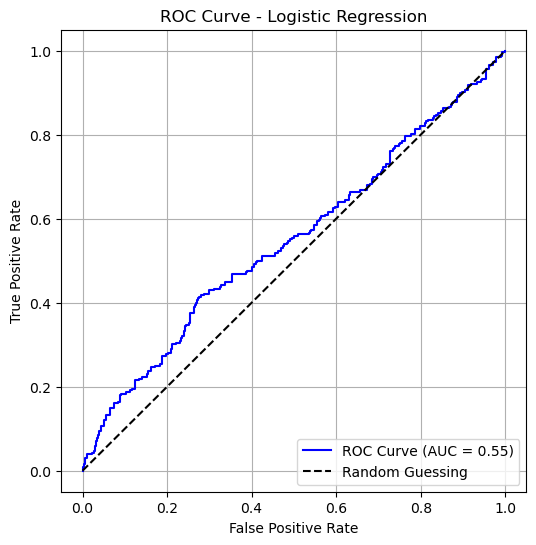

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, roc_auc_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("water_potability_cleaned.csv")

# Features & target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split (80% train, 20% test, stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 1: Balance dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ Step 2: Initialize Logistic Regression with class balancing
model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')

# Train the model
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

# Evaluation
print("✅ Logistic Regression Results (After Fix)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# ✅ Step 3: ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

print("\nROC AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


🌳 Random Forest Results
Accuracy: 0.6585365853658537

Confusion Matrix:
 [[299 101]
 [123 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.75      0.73       400
           1       0.57      0.52      0.54       256

    accuracy                           0.66       656
   macro avg       0.64      0.63      0.64       656
weighted avg       0.65      0.66      0.66       656


ROC AUC Score: 0.6844238281249999


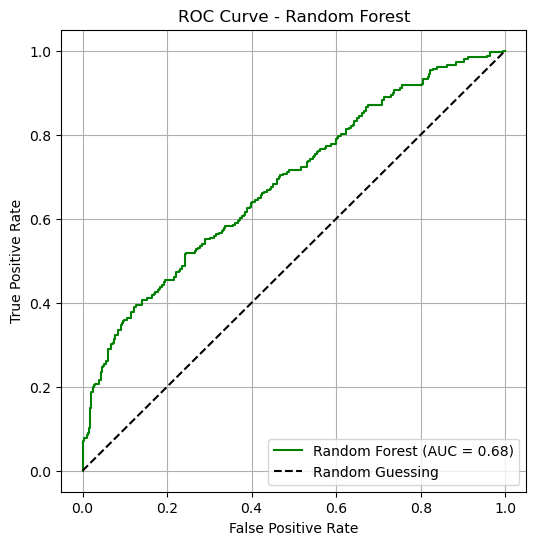

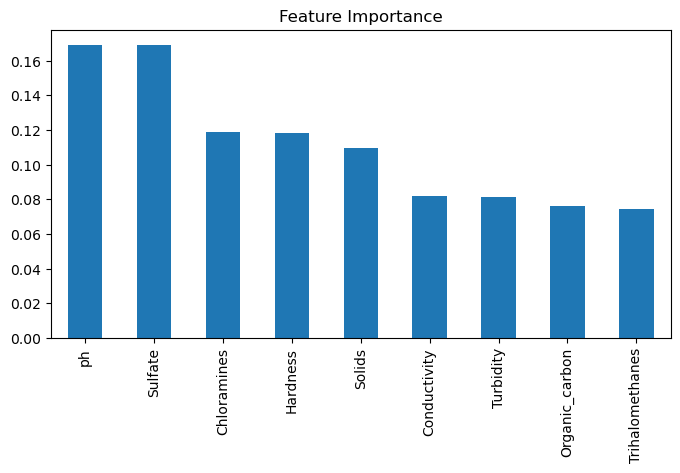

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load cleaned dataset
df = pd.read_csv("water_potability_cleaned.csv")

# Features & target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ✅ Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=10,          # limit depth (prevents overfitting)
    class_weight="balanced",# handle imbalance
    random_state=42
)

# Train the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("🌳 Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))

# ✅ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})", color="green")
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ✅ Feature Importance
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind="bar", figsize=(8,4), title="Feature Importance")
plt.show()